# Hintergrund:

Die Plastizität der Wurzelsystemarchitektur einer Pflanze ermöglicht Anpassung an Umweltbedinungen. Die Morphologie einzelner Wurzeln formt die Wurzelarchitektur. Um wichtige Rückschlüsse auf verschiedenste Anpassungserscheinungen der Pflanze zu bekommen müssen wir die Wurzelarchitektur untersuchen. Die Wurzelarchitektur von *Zea mays* Sorten besteht in den ersten Wochen aus primary, seminal, crown und lateral Wurzel (s. Bild a (Hochholdinger, 2009)). Sortenbedingt ist es an unterschiedliche Bedingungen agepasst. Sorten die in Regionen mit geringerer Wasserverfügbarkeit domestiziert wurden, unterscheiden sich bereits in den ersten 2 Wochen signifikant in ihrer Wurzelarchitektur. Neuste Studien zeigen, dass die Anpassungserscheinung des Sprösslings auf wenig Wasser, primär mit einer reduzierten Anzahl der seminalen Wurzeln und einhergehenden geringeren Abstand der lateralen Wurzeln auf der primary Wurzel, sowie der Wachstumsgeschwindigkeit der Primary, zusammenhängt (Peng et al., 2024). Modelle können uns helfen genauere Einblicke in die Anpassung der Architektur und der Funktion zu bekommen.


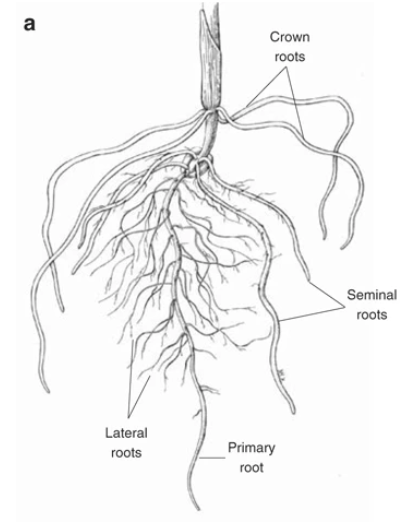





# 1. Aufgabe:

Nehmen Sie an, dass Sie zwei Sorten Mais vergleichen. Die Sorte "Durstig" ist in einer Region mit hoher Waserverfügbarkeit gezüchtet worden. Die Domnestizierung der Sorte "Genügsam" fand in einem semi-ariden Gebiet statt. Der oberirdische Teil der Pflanze ist gleich, die Unterschiede finden sich im Wurzelsystem. Die Sorte "Genügsam" bildet im Schnitt eine seminale Wurzel, die Sorte "Durstig" 4x so viele. Die lineare Wachstumsrate der Primary von "Durstig" beträgt 75% der von "Genügsam" und der Abstand der zwischen den lateralen Wurzeln auf der primary Wurzel beträgt im Schnitt 2 mm mehr bei "Durstig". Das Alter der untersuchten Pflanzen beträgt maximal 14 Tage.



# 1.1
Nehmen Sie das Parameterfile für die Sorte "Genügsam" und simulieren sie eine Pflanze mit CPlantBox für diese Sorte mit dem Beispiel Code unten und visualisieren Sie das Resultat.  

**Install CPlantBox**

In [1]:
import os

#is the notebook running on Colab?
if 'COLAB_JUPYTER_TRANSPORT' in os.environ.keys():
    isColab = True
    sourcedir =os.getcwd()+ "/CPlantBox"
    filedir = sourcedir +"/tutorial/jupyter/teaching"
else:
    isColab = False
    sourcedir = os.getcwd()+"/../../.."
    filedir = os.getcwd()
#this can take some minutes
if isColab:
    # downloading the source code
    ! git clone https://github.com/Plant-Root-Soil-Interactions-Modelling/CPlantBox --depth=1 --single-branch -b stable_v2.1
    os.chdir(sourcedir)
    !apt install libeigen3-dev
    ! apt install llvm-dev
    !pip3 install vtk
    !sudo DEBIAN_FRONTEND=noninteractive apt-get install -yq xvfb
    !pip install -q 'xvfbwrapper~=0.2.9'
    if 'vdisplay' not in globals():

        import xvfbwrapper
        vdisplay = xvfbwrapper.Xvfb()
        vdisplay.start()
    os.environ["CUDA_VISIBLE_DEVICES"] = "1"


    if os.path.exists("./src/external/pybind11"):
        ! rm -rf src/external/pybind11 #delete folder
    ! git rm -r --cached src/external/pybind11 #take out git cache for pybind11
    ! git submodule add --force -b stable https://github.com/pybind/pybind11.git ./src/external/pybind11


    ! git pull
    ! cmake .
    ! make
    os.chdir(filedir)

**Import required libraries**

In [2]:
import os
import sys; 
sys.path.append("./../../../")
sys.path.append("/mnt/c/Users/mobil/CPB_new/CPlantBox");

import plantbox as pb
import matplotlib.pyplot as plt # for 2d plots
import numpy as np
import pandas as pd
from plotnine import *

/home/fbauer/.local/lib/python3.9/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/tmp/ipykernel_104/3055169094.py:9: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**Simulate the plant**

In [3]:
# Create instance describing a plant
plant = pb.MappedPlant()
# Open plant  parameter from a file
path = "../../../modelparameter/structural/rootsystem/"
name = "Genuegsam"
plant.readParameters(path + name + ".xml")

# Simulate
N=14  # simulation time [days]
plant.initialize()
plant.simulate(N) # [days]

# Export
ana = pb.SegmentAnalyser(plant)
ana.write("Genuegsam.txt") # e.g. gui/viewer/rsml_viewer.py
plant.write("Genuegsam.vtp") # 3D vizualisation

OrganRandomParameter::readSuccessor: for parameter of organ 2, subType 1, 'ruleId' (and 'number') not found in successor definition. Use defeault ruleId instead: 0
OrganRandomParameter::readSuccessor: for parameter of organ 2, subType 4, 'ruleId' (and 'number') not found in successor definition. Use defeault ruleId instead: 0
OrganRandomParameter::readSuccessor: for parameter of organ 2, subType 5, 'ruleId' (and 'number') not found in successor definition. Use defeault ruleId instead: 0
OrganRandomParameter::readSuccessor: gave a stem a successor of subtype 2 and did not specify type. For backward compatibility, this will be considered as a leaf successor
MappedPlant::initialize 
Seed::initialize: Plant 
writing text file for Matlab import: Genuegsam.txt



**Visualize the plant**

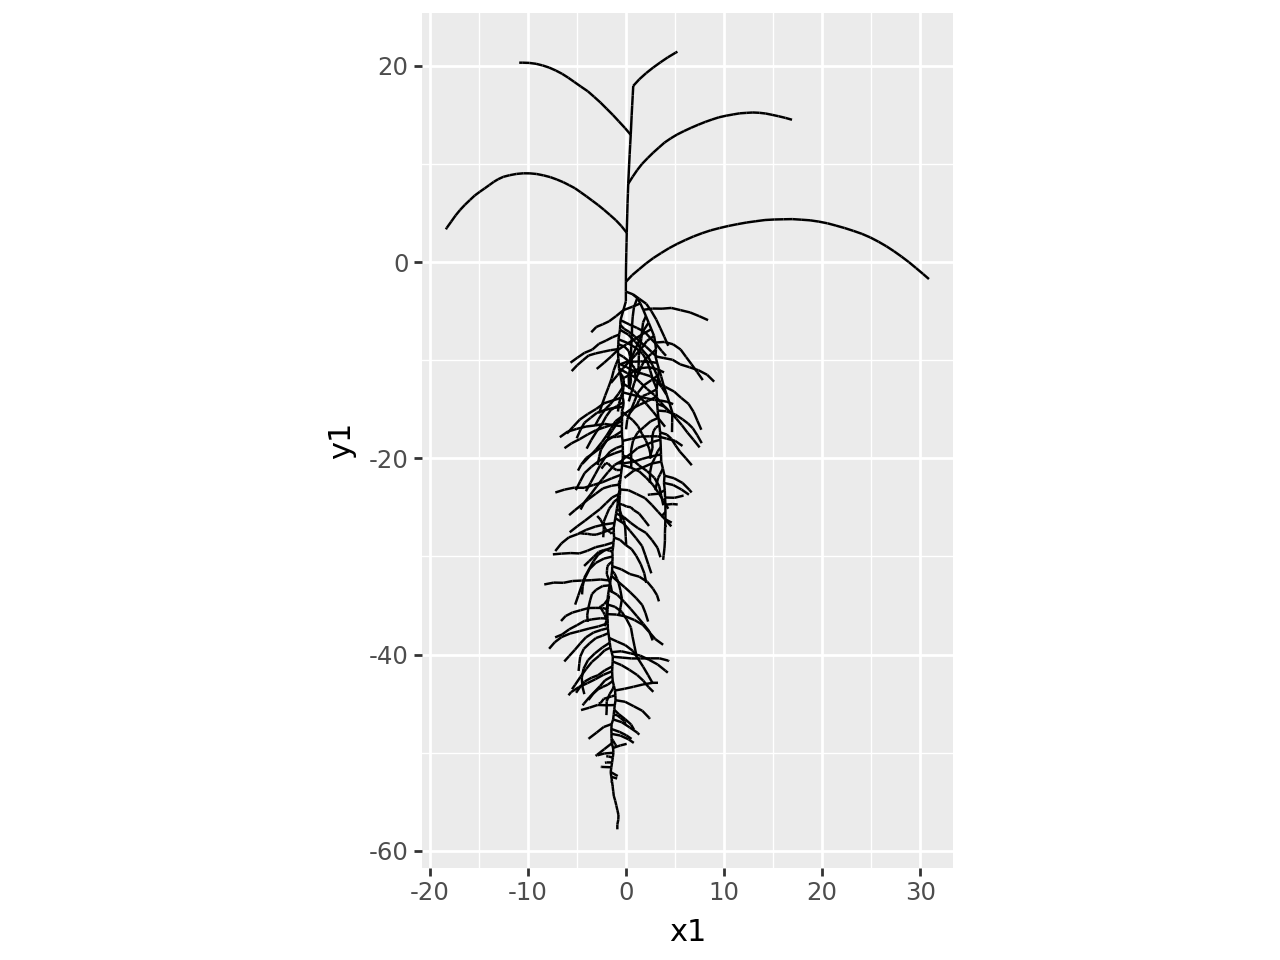

In [4]:
dat = pd.read_csv("Genuegsam.txt", sep=" ")

%matplotlib inline

(ggplot(dat)         # defining what data to use
 + aes()    # defining what variable to use
 + geom_segment(aes(x = "x1", y = "y1", xend = "x2", yend = "y2"))
 + coord_fixed()
)

# 1.2

Basierend auf dem Parameterfile für "Genügsam" verändern sie die Parameter "max. Anzahl der Seminalen (basalen) Wurzeln" (maxB), die Wachstumsrate der Primary (r) und den Abstand der lateralen auf der Primary (ln). Es ist Ihnen überlassen, ob Sie dies im Python-Code direkt machen oder ein zweites Parameterfile erstellen. Visualisieren Sie ebenfalls diese Sorte. Erkenne Sie bereits Unterschiede?





**Modify parameter**
Parameter can be modified in the python script directly:

We have to distinguish between parameters difining the organs, such as stem, leaf and roots and the parameters that originate from the seed, such as amount of basal roots (e.g. seminals).

To modify the root system parameters we have to use the *getOrganRandomParameter* on our plant object. To change parameter for the primary we use e.g.:

```
plant.getOrganRandomParameter(pb.root,1)
```

*pb.root* calls the type "root" and *1* is the proxy for primary (0 = seed, 2 = lateral, 4 = seminal, 5 = crown root). Consequently if you want to change a seed related paramtere, such as the amount of seminals, you use

```
plant.getOrganRandomParameter(pb.seed,0)
```



### Lösung

writing VTP... Genuegsam.vtp
OrganRandomParameter::readSuccessor: for parameter of organ 2, subType 1, 'ruleId' (and 'number') not found in successor definition. Use defeault ruleId instead: 0
OrganRandomParameter::readSuccessor: for parameter of organ 2, subType 4, 'ruleId' (and 'number') not found in successor definition. Use defeault ruleId instead: 0
OrganRandomParameter::readSuccessor: for parameter of organ 2, subType 5, 'ruleId' (and 'number') not found in successor definition. Use defeault ruleId instead: 0
OrganRandomParameter::readSuccessor: gave a stem a successor of subtype 2 and did not specify type. For backward compatibility, this will be considered as a leaf successor
MappedPlant::initialize 
Seed::initialize: Plant 
writing text file for Matlab import: Durstig.txt


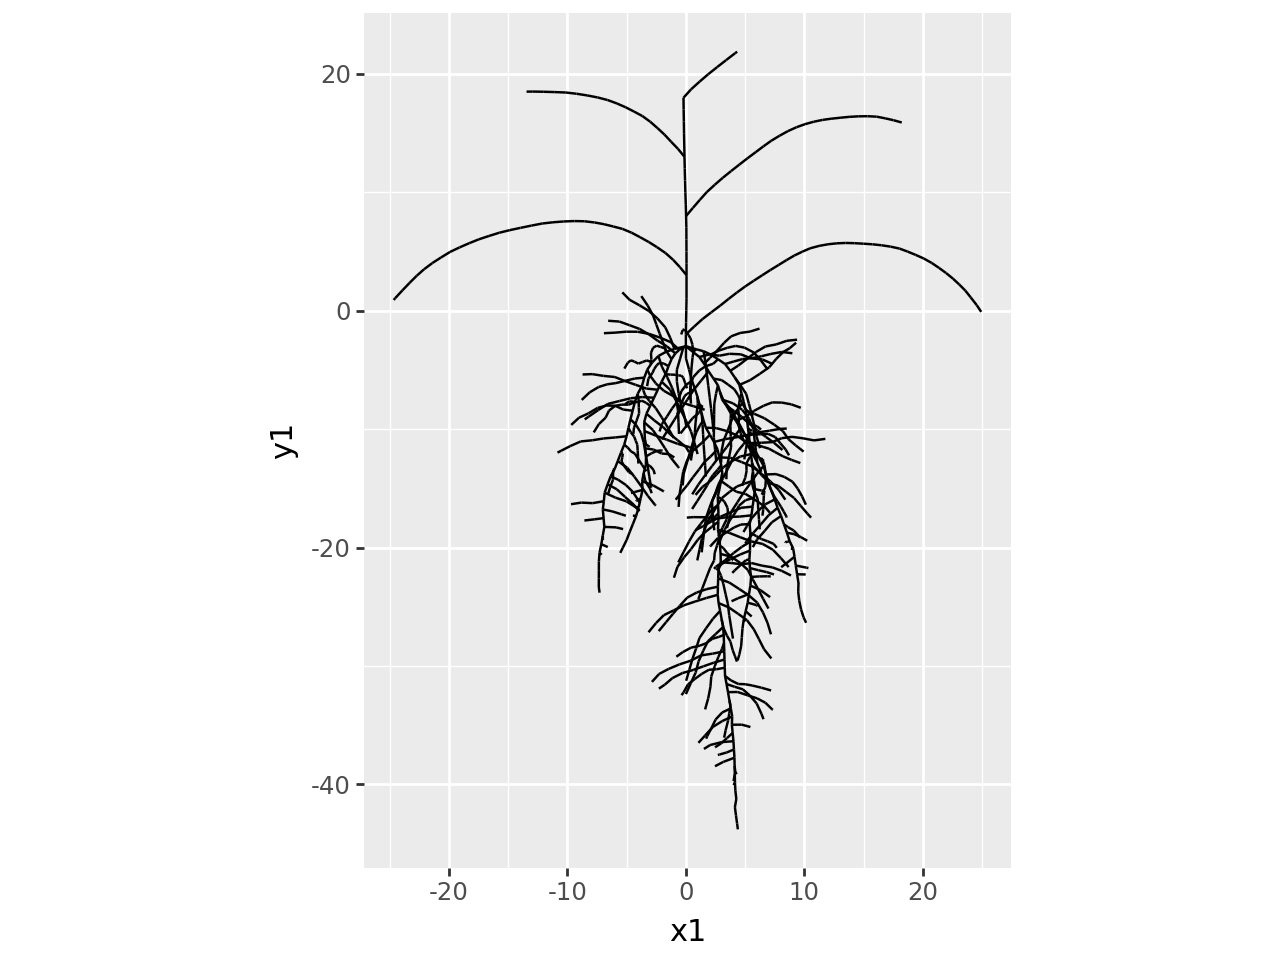

In [5]:
plant = pb.MappedPlant()
path = "../../../modelparameter/structural/rootsystem/"
name = "Genuegsam"
plant.readParameters(path + name + ".xml")
N=14

#Modify key parameter for the primray root
p= plant.getOrganRandomParameter(pb.root,1)
p.r = p.r*0.75
p.ln = p.ln+0.2

#Modify key parameter from the seed (seminal root count)
srp = plant.getOrganRandomParameter(pb.seed,0)
srp.maxB = 4

#Initilize
plant.initialize()
plant.simulate(N)

ana = pb.SegmentAnalyser(plant)
ana.write("Durstig.txt")

dat = pd.read_csv("Durstig.txt", sep=" ")

#Visualize
%matplotlib inline
(ggplot(dat)         # defining what data to use
 + aes()    # defining what variable to use
 + geom_segment(aes(x = "x1", y = "y1", xend = "x2", yend = "y2"))
 + coord_fixed()
)

# 1.3
Plotten Sie die Wurzellängendichte (RLD [cm cm^-3]) für das gesamte Wurzelsystem zu den Zeitpunkten 3, 5, 7, 10 und 14 Tagen, Vergleichen Sie die RLD für beide Sorten und diskutieren Sie die Resultate, auch in hinsicht auf potentielle Trockenstressvermeidungsstrategien.  Unten eine kurze Einführung der nutzbaren Fuktionen der Klasse *SegmentAnalyser*.


**Analyse results from the class *SegmentAnalyser* (values per segment) in a loop**

The main functionality of the *SegmentAnalyser* class is:
* *getParameter(name)* as for *RootSystem* class, but returning a value for each segment, especially the "creationTime" of each segment
* *filter(name, min, max)* will keep only segments where the value of parameter *name* is within [min, max]
* *crop(sdf)* will keep only segments inside a geometry (e.g. in a soil core), segments intersecting the domain boundary are cut.
* *distribution(...)* will create a 1d plot versus depth, where parameters are summed in layers
* *distribution2d(...)* as above but 2d
* *mapPeriodic(length, width)* maps the unconstrained root system into a periodic domain
* *addData(name, data)* attach user data to the segments (e.g. simulation results for visualization or export)

Note that *SegmentAnalyser* is only loosly connected to the original simulation.


### Lösung
Für eine Pflanze zu allen Zeitpunkten


OrganRandomParameter::readSuccessor: for parameter of organ 2, subType 1, 'ruleId' (and 'number') not found in successor definition. Use defeault ruleId instead: 0
OrganRandomParameter::readSuccessor: for parameter of organ 2, subType 4, 'ruleId' (and 'number') not found in successor definition. Use defeault ruleId instead: 0
OrganRandomParameter::readSuccessor: for parameter of organ 2, subType 5, 'ruleId' (and 'number') not found in successor definition. Use defeault ruleId instead: 0
OrganRandomParameter::readSuccessor: gave a stem a successor of subtype 2 and did not specify type. For backward compatibility, this will be considered as a leaf successor
MappedPlant::initialize 


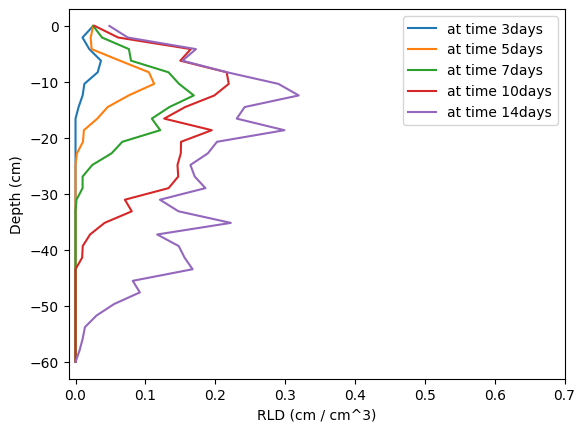

In [6]:
plant = pb.MappedPlant()
path = "../../../modelparameter/structural/rootsystem/"
name = "Genuegsam"
plant.readParameters(path + name + ".xml")
plant.setGeometry(pb.SDF_PlantBox(1.e6,1.e6,1.e6))
plant.initialize()

simtimes = [0,3,5,7,10,14] # day
dt_ = np.diff(simtimes) # day
depth = 60 # cm
layers = 30 # [1]

""" Simulation loop cv. Genuegsam """
genuegsam_rld_ = []
for dt in dt_:
    plant.simulate(dt)
    ana = pb.SegmentAnalyser(plant) # create a SegmentAnalyser object
    genuegsam_rld = ana.distribution("length", 0., -depth, layers, True)
    genuegsam_rld_.append(genuegsam_rld) # store relevant data in a list


""" vizualize rld_ """
soilvolume = (depth / layers) * 10 * 10
genuegsam_rld_ = np.array(genuegsam_rld_) / soilvolume  # convert to density [cm2/cm3]

z_ = np.linspace(0, -depth, layers)  # z - axis
for i, t in enumerate(simtimes[1:]):
    plt.plot(genuegsam_rld_[i,:], z_, label = "at time "+str(t)+'days')

plt.xlabel("RLD (cm / cm^3)")
plt.ylabel("Depth (cm)")
plt.legend()
plt.xlim(-0.01,0.7)

# plt.savefig("RLD.png")
plt.show()


Seed::initialize: Plant 
OrganRandomParameter::readSuccessor: for parameter of organ 2, subType 1, 'ruleId' (and 'number') not found in successor definition. Use defeault ruleId instead: 0
OrganRandomParameter::readSuccessor: for parameter of organ 2, subType 4, 'ruleId' (and 'number') not found in successor definition. Use defeault ruleId instead: 0
OrganRandomParameter::readSuccessor: for parameter of organ 2, subType 5, 'ruleId' (and 'number') not found in successor definition. Use defeault ruleId instead: 0
OrganRandomParameter::readSuccessor: gave a stem a successor of subtype 2 and did not specify type. For backward compatibility, this will be considered as a leaf successor
MappedPlant::initialize 


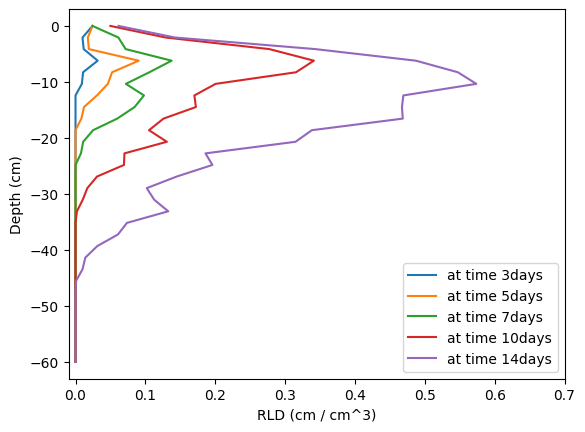

In [7]:
plant = pb.MappedPlant()
path = "../../../modelparameter/structural/rootsystem/"
name = "Genuegsam"
plant.readParameters(path + name + ".xml")
plant.setGeometry(pb.SDF_PlantBox(1.e6,1.e6,1.e6))

#Modify key parameter for the primray root
p= plant.getOrganRandomParameter(pb.root,1)
p.r = p.r*0.75
p.ln = p.ln+0.2

#Modify key parameter from the seed (seminal root count)
srp = plant.getOrganRandomParameter(pb.seed,0)
srp.maxB = 4

plant.initialize()

simtimes = [0,3,5,7,10,14] # day
dt_ = np.diff(simtimes) # day
depth = 60 # cm
layers = 30 # [1]

""" Simulation loop cv. Durstig """
durstig_rld_ = []
for dt in dt_:
    plant.simulate(dt)
    ana = pb.SegmentAnalyser(plant) # create a SegmentAnalyser object
    durstig_rld = ana.distribution("length", 0., -depth, layers, True)
    durstig_rld_.append(durstig_rld) # store relevant data in a list


""" vizualize rld_ """
soilvolume = (depth / layers) * 10 * 10
durstig_rld_ = np.array(durstig_rld_) / soilvolume  # convert to density [cm2/cm3]

z_ = np.linspace(0, -depth, layers)  # z - axis
for i, t in enumerate(simtimes[1:]):
    plt.plot(durstig_rld_[i,:], z_, label = "at time "+str(t)+'days')

plt.xlabel("RLD (cm / cm^3)")
plt.ylabel("Depth (cm)")
plt.legend()
plt.xlim(-0.01,0.7)

# plt.savefig("RLD.png")
plt.show()

# 1.4
Untersuchen Sie welcher der drei Parameter am meisten Unterschiede in der totalen Wurzellänge verursacht für einen 14 Tage alten Sprössling. Tipp: Verändern Sie jeden Parameter (z.B. x0,5 und x2) einzeln und plotten Sie die Länge. Interpretieren Sie das Ergbeniss.  

# Hintergrund

Die Wasseraufnahme Kapazität der Pflanze wird nicht nur durch die Architektur des Wurzelsystems bestimmt, die funktionelle hydraulische Anatomie des Wurzelsystems spielt eine ebenfalls sehr wichtige Rolle (Couvreur, 2012). Der axiale Leitfähigkeit (axial conductance, Kx) der Wurzeln und die radiale Durchlässigkeit (radial conductivity, kr) sind wichtige Parameter um die gesamte Leitfähkeit des Wurzelsystems (Krs) zu berechnen. CPlantBox bietet die möglichkeit Krs zu berchnen, wenn Kx und kr bereits vorhanden sind. Kx lässt sich über das Hagen-Poiseuille Gesetz, auf das Xylem angewandt, berechnen.

Kx = (a^4×π)/(8×η)

mit
a = Xylem Radius;
η = dynamische Viskosität des Fluids;


kr ist jedoch schwierig zu bestimmen. Nehmen Sie an das die Werte für Kx und kr bereits gegeben sind für definierte Zeitpunkte bis 14 Tage nach Beginn der Simulation.  

Für eine CPlantBox Simulation lassen sich die Module hinzufügen im funktionale Aspkete zu untersuchen. Das Modul, dass wir für die Berechnung des Krs benötigen heißt *XylemFluxPython*. Sie können es als ```from functional.xylem_flux import XylemFluxPython``` importieren. Neue Objekte werden als
``` 
r = XylemFluxPython(plant)
```
definiert. Die ```XylemFluxPython``` Objekte müssen kr und Kx Werte zugeteilt bekommen. Dieser verändert sich über die Zeit. Nutzen Sie ```r.setKrTables()``` und ```r.setKxTables()``` um die zeitabhängigen kr und Kx Werte zu definieren. Dabei sieht der Inhalt der Funktionen wir folgend aus: 

```
r.setKrTables([[Primary Zeit, Lateral Zeit, Seminal Zeit, Crown Roots Zeit],[Stamm kr],[Blatt kr]],
                [[Primary kr, Lateral kr, Seminal kr, Crown Roots kr],[Stamm kr],[Blatt kr]])
```
(Für Kx wird ```r.setKxTables()```genutzt.)

Um den Krs von CPlantBox ausgegeben zu bekommen, können Sie die Funktion ```r.get_krs()``` nutzen. 

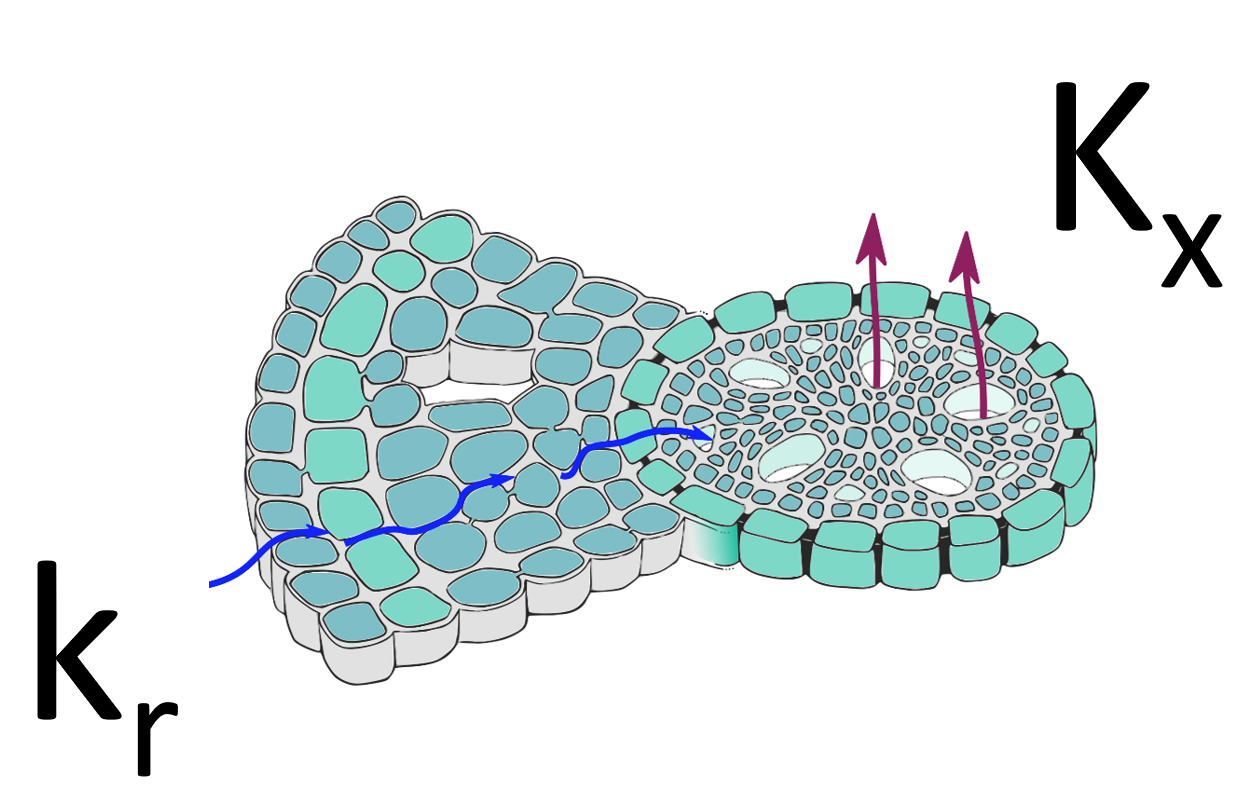

# Aufgabe 2


## 2.1
Nehmen Sie an, dass die Sorten *Zea mays* cv. "Genügsam" und cv. "Durstig" identische hydraulische Eigenschaften haben. Erstellen Sie für beide Sorten je ein CPlantBox Model, dass die hydraulischen Parameter kr und Kx berücksichtigt und berechnen Sie den Krs mit CPlantBox. Vergleichen Sie die Ergbeniss der verschiedenen Sorten, stellen Sie die Ergebnisse grafische da und interpretieren Sie.

Nutzen Sie für die Modelparameterisierung folgende Werte für das Wurzelsystem:
```
kr_primary = np.array([[0.2,0.000106343],[1.,0.00010643][3.,0.000113566],[5.,3.99E-05],[7.,3.68E-05],[11.,3.89E-05],[14.,4.10E-05]])
kr_lateral= np.array([[0.2,0.000112594],[1.,0.000113439],[3.,0.000122518],[5.,0.000123039],[7.,4.23E-05],[11.,3.93E-05],[14.,4.16E-05]])
kr_seminal =np.array([[0.2,0.000113248],[1.,0.000122518],[3.,4.2315e-05],[5.,4.25832e-05],[7.,3.92503e-05],[11.,4.16085e-05],[14.,4.30515e-05]])
kr_crown = np.array([[0.2,0.000133676],[1.,0.000135067],[3.,.000147261],[5.,5.28E-05],[7.,5.08E-05],[11.,5.24E-05],[14.,5.67E-05]])

Kx_primary = np.array([[0.2,0.001428701],[1.,0.001467545],[3.,0.001336126],[5.,0.163310872],[7.,0.173627719],[11.,0.161798441],[14.,0.243831044])
Kx_lateral = np.array([[0.2,0.001043448],[1.,0.001067554],[3.,0.000985499],[5.,0.000801025],[7.,0.000833276],[11.,0.112154361],[14.,0.101482174]])
Kx_seminal = np.array([[0.2,0.0010525523998907351],[1.,0.0009854992034376783],[3.,0.0008332761382412236],[5.,0.11315436059298149][7.,0.11215436059298149],[11.,0.10148217370333051],[14.,0.150518047844499]])
Kx_crown = np.array([[0.2,0.006101211],[1.,0.005785935],[3.,0.006388351],[7.,2.344891587],[11.,4.094611567],[14.,6.608610426]])
````
Da Stamm und Blätter ebenfalls eine Parameterisierung beötigen, aber in Ihrere weiteren Berechnung keine Rolle spielen, berechnen Sie für den Stamm einen konstanten Kx Werte mit dem Hagen-Poiseuille-Gesetz mit a=0.02cm, η= 1.2e-10 und kr=0. Nehmen Sie für die Blätter einen sehr hohen kr Wert, sodass sie nicht limitierend wirken (z.B. ```kr_leaf = np.array([[0, 100000], [1e4, 100000]])```) und Kx entsprechen 10% vom Stamm (Lobet et al.,2014).

Tipp: Bei der Implementierung können Sie auf die Beispiele in CPlantBox Repository (/tutorial/examples/) zugreifen. Außerdem kann Ihnen folgende Publikation bei der Interpretation helfen (https://doi.org/10.1101/2024.05.31.596894). Auch die relevanten Gleichungen um den Krs nach Meunier et al. (2020) zu berechnen finden sich dort.


### Lösung


Seed::initialize: Plant 
OrganRandomParameter::readSuccessor: for parameter of organ 2, subType 1, 'ruleId' (and 'number') not found in successor definition. Use defeault ruleId instead: 0
OrganRandomParameter::readSuccessor: for parameter of organ 2, subType 4, 'ruleId' (and 'number') not found in successor definition. Use defeault ruleId instead: 0
OrganRandomParameter::readSuccessor: for parameter of organ 2, subType 5, 'ruleId' (and 'number') not found in successor definition. Use defeault ruleId instead: 0
OrganRandomParameter::readSuccessor: gave a stem a successor of subtype 2 and did not specify type. For backward compatibility, this will be considered as a leaf successor
MappedPlant::initialize 


(0.0, 0.014)

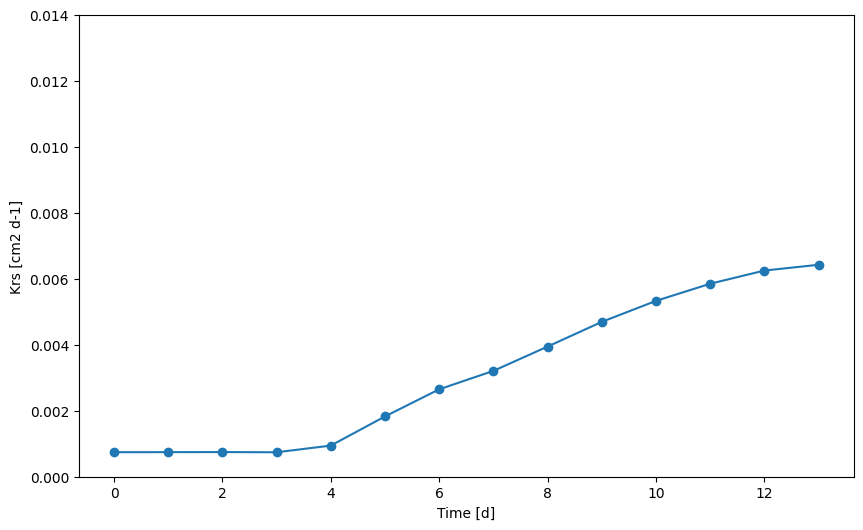

In [13]:
# Create Plant
import sys
CPBdir = "../../.."
sys.path.append(CPBdir + "/src");
sys.path.append("../../..");
from functional.xylem_flux import XylemFluxPython
import plantbox as pb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
rs = pb.MappedPlant()
path = "../../../modelparameter/structural/rootsystem/"
name = "Genuegsam"
rs.readParameters(path + name + ".xml")
rs.setGeometry(pb.SDF_PlantBox(1.e6,1.e6,1.e6))

##Uncomment for cv. 'Durstig'
##Modify key parameter for the primray root
p= rs.getOrganRandomParameter(pb.root,1)
p.r = p.r*0.75
p.ln = p.ln+0.2

##Modify key parameter from the seed (seminal root count)
#srp = rs.getOrganRandomParameter(pb.seed,0)
#srp.maxB = 4

rs.initialize()

# Define kr and kx
kr_primary = np.array([[0.2,0.000106343],[1.,0.00010643],[3.,0.000113566],[5.,3.99E-05],[7.,3.68E-05],[11.,3.89E-05],[14.,4.10E-05]])
kr_lateral= np.array([[0.2,0.000112594],[1.,0.000113439],[3.,0.000122518],[5.,0.000123039],[7.,4.23E-05],[11.,3.93E-05],[14.,4.16E-05]])
kr_seminal =np.array([[0.2,0.000113248],[1.,0.000122518],[3.,4.2315e-05],[5.,4.25832e-05],[7.,3.92503e-05],[11.,4.16085e-05],[14.,4.30515e-05]])
kr_crown = np.array([[0.2,0.000133676],[1.,0.000135067],[3.,.000147261],[5.,5.28E-05],[7.,5.08E-05],[11.,5.24E-05],[14.,5.67E-05]])
kr_stem = np.array([[0, 0], [1e4, 0]])
kr_leaf = np.array([[0, 100000], [1e4, 100000]])

Kx_primary = np.array([[0.2,0.001428701],[1.,0.001467545],[3.,0.001336126],[5.,0.163310872],[7.,0.173627719],[11.,0.161798441],[14.,0.243831044]])
Kx_lateral = np.array([[0.2,0.001043448],[1.,0.001067554],[3.,0.000985499],[5.,0.000801025],[7.,0.000833276],[11.,0.112154361],[14.,0.101482174]])
Kx_seminal = np.array([[0.2,0.0010525523998907351],[1.,0.009854992034376783],[3.,0.008332761382412236],[5.,0.11315436059298149],[7.,0.11215436059298149],[11.,0.10148217370333051],[14.,0.150518047844499]])
Kx_crown = np.array([[0.2,0.006101211],[1.,0.005785935],[3.,0.006388351],[7.,2.344891587],[11.,4.094611567],[14.,6.608610426]])
hp_stem = (np.pi*0.02**4)/(8*1.2e-10)
kx_stem = np.array([[0, hp_stem*1000], [1e4, hp_stem*1000]])
Kx_leaf = np.array([[0, hp_stem/10], [1e4, hp_stem/10]])


# Create 'XylemFlux' Object
r = XylemFluxPython(rs)
r.setKrTables([[ kr_primary[:, 1], kr_lateral[:, 1], kr_seminal[:, 1], kr_crown[:, 1]],[kr_stem[:, 1]],[kr_leaf[:, 1]]],
               [[kr_primary[:, 0], kr_lateral[:, 0], kr_seminal[:, 0], kr_crown[:, 0]],[kr_stem[:, 0]],[kr_leaf[:, 0]]])
r.setKxTables([[Kx_primary[:, 1], Kx_lateral[:, 1], Kx_seminal[:, 1], Kx_crown[:, 1]],[kx_stem[:, 1]],[Kx_leaf[:, 1]]],
                [[Kx_primary[:, 0], Kx_lateral[:, 0], Kx_seminal[:, 0], Kx_crown[:, 0]],[kx_stem[:, 0]],[Kx_leaf[:, 0]]])

r.airPressure = -15000 #static air pressure

# Simulate
N=14  # simulation time [days]
r.rs.simulate(N) # [days]

#small function to get the Krs for each time step
def get_krs_values(N):
    krs_values = []
    for i in range(N):
        krs = r.get_krs(i, plant = True)[0]
        krs_values.append(krs)
    return krs_values,krs

krs_values = get_krs_values(N)[0]

# Generate the plot
plt.figure(figsize=(10, 6))
plt.plot(range(N), krs_values, marker='o')
plt.xlabel('Time [d]')
plt.ylabel('Krs [cm2 d-1]')
plt.ylim(0.0,.014)


## 2.2
Die Standard Uptake Fraction (SUF) gibt Aufschluss wie viel Wasser aus welcher Bodentiefe und Verteilung durch das Wurzelsystem genommen wird. Die SUF gibt uns somit eine zusätzliche Information, die uns helfen kann die Funktion der unterschiedlichen Wurzelsystematchitekturen von 'Genügsam' und 'Durstig' zu verstehen. Berechnen Sie die SUF für beide Sorten und diskutieren Sie die Unterschiede in Hinblick auf mögliche Trockenstressvermeidungsstrategien. Stellen Sie die Ergebnisse für die 14 Tage alten Pflanzen graphisch da. 

Sie können folgende Funktionen nutzen:
für SUF: ```r.get_suf()```,
für Node-Struktur der Pflanze: ```r.get_nodes()``` ,
für Wurzel sub-typen der Pflanze: ```r.get_subtypes()``` .

TIPP: Es bietet sich an die SUF verteilung über die Tiefe und für die verschiedenen Wurzeltypen zu plotten um unterschiede zu sehen.


(0.0, 1.0)

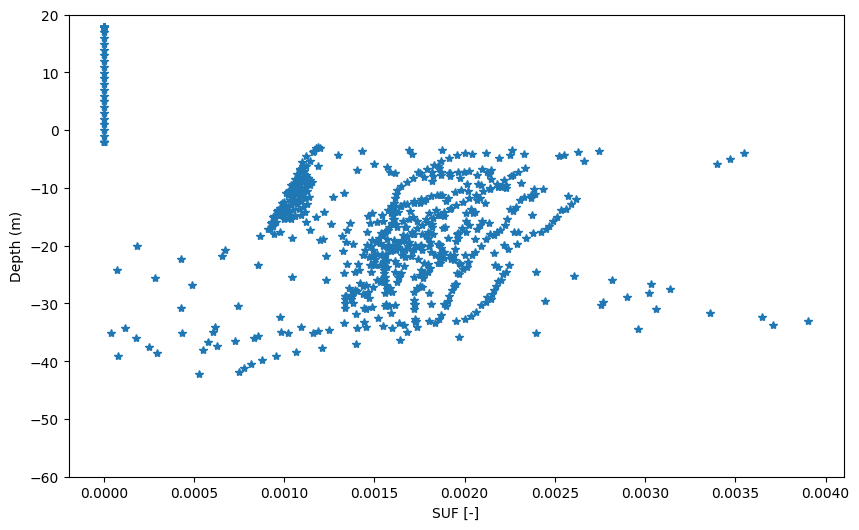

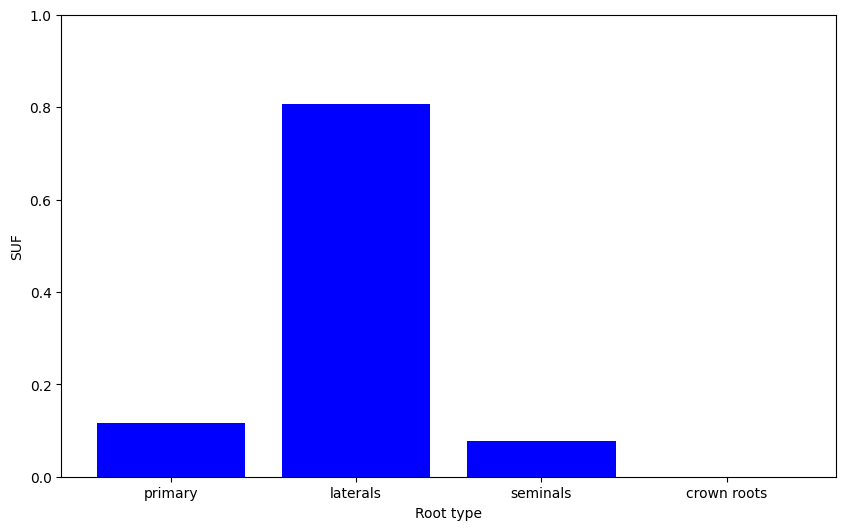

In [15]:
#get SUF
suf = r.get_suf(N)    
#get information about nodes and subtypes from CPlantBox at 14 days 
# type: 0 = primary, 2 = lateral, 3 = seminal, 4 = crown roots
nodes = r.get_nodes()
types  = r.get_subtypes()

#Plot SUF over depth distribution
plt.figure(figsize=(10, 6))
plt.plot(suf, nodes[1:, 2],"*")
plt.xlabel("SUF [-]")
plt.ylabel("Depth (m)")
plt.ylim(-60,20)

# aggregate data for root types
df = pd.DataFrame({'type': types,'SUF': suf}) # create a data frame
df = df.groupby('type').sum() # sum SUF for types

# plot SUF depending on the root types to see the water uptake contribution
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['SUF'], color='blue')
plt.xlabel('Root type')  
plt.ylabel('SUF')  
plt.xticks(df.index,['primary', 'laterals', 'seminals', 'crown roots'])  # Ensure that all types are labeled
plt.ylim(0,1)


### Lösung (Loop basiert zum direkten Vergleich)

Seed::initialize: Plant 
OrganRandomParameter::readSuccessor: for parameter of organ 2, subType 1, 'ruleId' (and 'number') not found in successor definition. Use defeault ruleId instead: 0
OrganRandomParameter::readSuccessor: for parameter of organ 2, subType 4, 'ruleId' (and 'number') not found in successor definition. Use defeault ruleId instead: 0
OrganRandomParameter::readSuccessor: for parameter of organ 2, subType 5, 'ruleId' (and 'number') not found in successor definition. Use defeault ruleId instead: 0
OrganRandomParameter::readSuccessor: gave a stem a successor of subtype 2 and did not specify type. For backward compatibility, this will be considered as a leaf successor
MappedPlant::initialize 
Summed SUF at day cv. Genügsam : 1.0
Seed::initialize: Plant 
OrganRandomParameter::readSuccessor: for parameter of organ 2, subType 1, 'ruleId' (and 'number') not found in successor definition. Use defeault ruleId instead: 0
OrganRandomParameter::readSuccessor: for parameter of organ 

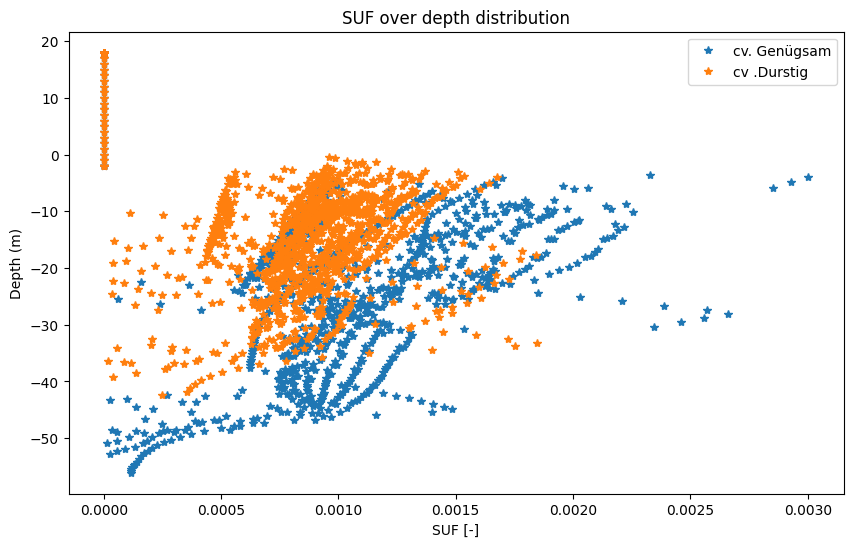

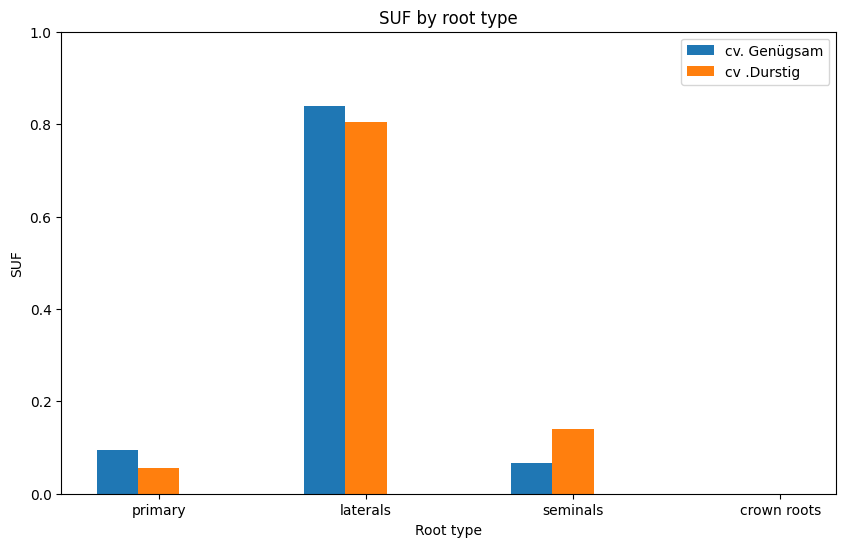

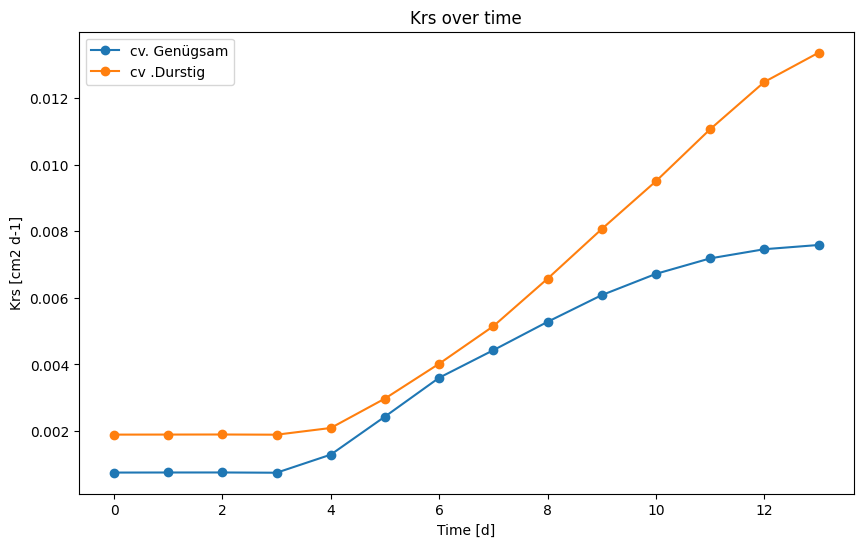

In [16]:
# Small function to get the Krs for each time step
def get_krs_values(N, r):
    krs_values = []
    for i in range(N):
        krs = r.get_krs(i, plant=True)[0]
        krs_values.append(krs)
    return krs_values

# Define kr and kx
kr_primary = np.array([[0.2,0.000106343],[1.,0.00010643],[3.,0.000113566],[5.,3.99E-05],[7.,3.68E-05],[11.,3.89E-05],[14.,4.10E-05]])
kr_lateral = np.array([[0.2,0.000112594],[1.,0.000113439],[3.,0.000122518],[5.,0.000123039],[7.,4.23E-05],[11.,3.93E-05],[14.,4.16E-05]])
kr_seminal = np.array([[0.2,0.000113248],[1.,0.000122518],[3.,4.2315e-05],[5.,4.25832e-05],[7.,3.92503e-05],[11.,4.16085e-05],[14.,4.30515e-05]])
kr_crown = np.array([[0.2,0.000133676],[1.,0.000135067],[3.,.000147261],[5.,5.28E-05],[7.,5.08E-05],[11.,5.24E-05],[14.,5.67E-05]])
kr_stem = np.array([[0, 0], [1e4, 0]])
kr_leaf = np.array([[0, 100000], [1e4, 100000]])

Kx_primary = np.array([[0.2,0.001428701],[1.,0.001467545],[3.,0.001336126],[5.,0.163310872],[7.,0.173627719],[11.,0.161798441],[14.,0.243831044]])
Kx_lateral = np.array([[0.2,0.001043448],[1.,0.001067554],[3.,0.000985499],[5.,0.000801025],[7.,0.000833276],[11.,0.112154361],[14.,0.101482174]])
Kx_seminal = np.array([[0.2,0.0010525523998907351],[1.,0.009854992034376783],[3.,0.008332761382412236],[5.,0.11315436059298149],[7.,0.11215436059298149],[11.,0.10148217370333051],[14.,0.150518047844499]])
Kx_crown = np.array([[0.2,0.006101211],[1.,0.005785935],[3.,0.006388351],[7.,2.344891587],[11.,4.094611567],[14.,6.608610426]])
hp_stem = (np.pi*0.02**4)/(8*1.2e-10)
kx_stem = np.array([[0, hp_stem*1000], [1e4, hp_stem*1000]])
Kx_leaf = np.array([[0, hp_stem/10], [1e4, hp_stem/10]])

all_krs_values = [] # Store krs_values for each simulation
all_suf_values = [] # Store SUF values for each simulation
all_nodes = [] # Store nodes for each simulation
all_types = [] # Store types for each simulation

simulation_names = ["cv. Genügsam", "cv .Durstig"]

for i in range(2): # Loop to iterate over the cultivar simulations
    rs = pb.MappedPlant()
    path = "../../../modelparameter/structural/rootsystem/"
    name = "Genuegsam"
    rs.readParameters(path + name + ".xml")
    rs.setGeometry(pb.SDF_PlantBox(1.e6, 1.e6, 1.e6))

    # Modify cv. Genügsam to cv. 'Durstig'
    if i == 1:
        p = rs.getOrganRandomParameter(pb.root, 1)
        p.r = p.r * 0.75
        p.ln = p.ln + 0.2

        srp = rs.getOrganRandomParameter(pb.seed, 0)
        srp.maxB = 4

    rs.initialize()

    r = XylemFluxPython(rs)
    r.setKrTables([[kr_primary[:, 1], kr_lateral[:, 1], kr_seminal[:, 1], kr_crown[:, 1]], [kr_stem[:, 1]], [kr_leaf[:, 1]]],
                  [[kr_primary[:, 0], kr_lateral[:, 0], kr_seminal[:, 0], kr_crown[:, 0]], [kr_stem[:, 0]], [kr_leaf[:, 0]]])
    r.setKxTables([[Kx_primary[:, 1], Kx_lateral[:, 1], Kx_seminal[:, 1], Kx_crown[:, 1]], [kx_stem[:, 1]], [Kx_leaf[:, 1]]],
                  [[Kx_primary[:, 0], Kx_lateral[:, 0], Kx_seminal[:, 0], Kx_crown[:, 0]], [kx_stem[:, 0]], [Kx_leaf[:, 0]]])

    r.airPressure = -15000 # Static air pressure

    # Simulate
    N = 14  # Simulation time [days]
    r.rs.simulate(N) # [days]

    krs_values = get_krs_values(N, r) # Call Krs function
    all_krs_values.append(krs_values)
    
    # Get SUF
    suf = r.get_suf(N)
    print("Summed SUF at day", simulation_names[i], ":", np.round(np.sum(suf[suf >= 0]), 2)) # Check if SUF of roots = 1

    # Get information about nodes and subtypes from CPlantBox
    nodes = r.get_nodes()
    types = r.get_subtypes()

    # Store SUF values, nodes, and types
    all_suf_values.append(suf)
    all_nodes.append(nodes)
    all_types.append(types)

# Plot SUF over depth distribution for both simulations in one figure
plt.figure(figsize=(10, 6))
for idx, (suf, nodes) in enumerate(zip(all_suf_values, all_nodes)):
    plt.plot(suf, nodes[1:, 2], "*", label=simulation_names[idx])
plt.xlabel("SUF [-]")
plt.ylabel("Depth (m)")
plt.legend()
plt.title('SUF over depth distribution')
plt.show()

# Plot SUF by root type for both simulations in one figure
plt.figure(figsize=(10, 6))
for idx, (suf, types) in enumerate(zip(all_suf_values, all_types)):
    df = pd.DataFrame({'type': types, 'SUF': suf}) # Create a data frame
    df = df.groupby('type').sum() # Sum SUF for types
    plt.bar(df.index + idx*0.2, df['SUF'], width=0.2, label=simulation_names[idx]) # Shift bars for each simulation
plt.xlabel('Root type')
plt.ylabel('SUF')
plt.xticks(df.index + 0.2, ['primary', 'laterals', 'seminals', 'crown roots'])  # Ensure that all types are labeled
plt.ylim(0, 1)
plt.legend()
plt.title('SUF by root type')
plt.show()

# Generate the plot for Krs
plt.figure(figsize=(10, 6))
for idx, krs_values in enumerate(all_krs_values):
    plt.plot(range(N), krs_values, marker='o', label=simulation_names[idx])
plt.xlabel('Time [d]')
plt.ylabel('Krs [cm2 d-1]')
plt.legend()
plt.title('Krs over time')
plt.show()
